<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/kaggle_mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report

In [31]:
!gunzip './sample_data/train.csv.gz'

In [32]:
#train = np.loadtxt('./sample_data/mnist_train_small.csv', delimiter=',', skiprows=1)
train = np.loadtxt('./sample_data/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./sample_data/mnist_test.csv', delimiter=',', skiprows=1)

In [47]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
test_label = test[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test[:, 1:], (test.shape[0], 28, 28))
train_img.shape

(42000, 28, 28)

In [48]:
test_img.shape

(9999, 28, 28)

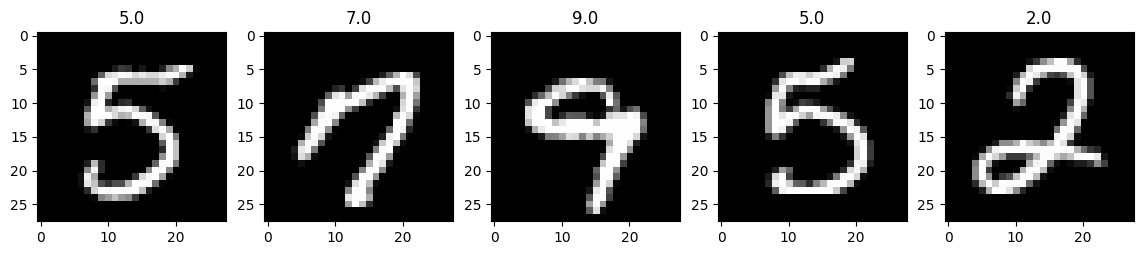

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [34]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (14,14)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

In [49]:
X_train = []
X_test = []
for i in train_img:
  X_train.append(hog.compute(np.uint8(i)))
for i in test_img:
  X_test.append(hog.compute(np.uint8(i)))
y_train = train_label
y_test = test_label

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [50]:
knn = KNeighborsClassifier()
knn.fit(X_scaled, y_train)


KNeighborsClassifier()

In [51]:
test_accuracy = knn.score(scaler.transform(X_test), y_test)
print(test_accuracy)

0.9728972897289729


In [54]:
y_pred = knn.predict(scaler.transform(X_test))
y_pred[0:10]

array([2., 1., 0., 4., 1., 4., 9., 5., 9., 0.])

In [53]:
y_test[0:10]

array([2., 1., 0., 4., 1., 4., 9., 5., 9., 0.])